In [1]:
import pandas as pd
import pysax
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from IPython.html.widgets import interact, fixed

:0: FutureWarning: IPython widgets are experimental and may change in the future.


In [25]:
# s = pd.read_table(open("data/chfdb_chf01_275.txt","r"), index_col = 0, header = None, names = ['a','b'])
s = pd.read_table(open("data/chfdb_chf01_275_one.txt","r"), header = None, names = ['a'])

In [21]:
s.shape

(3751, 1)

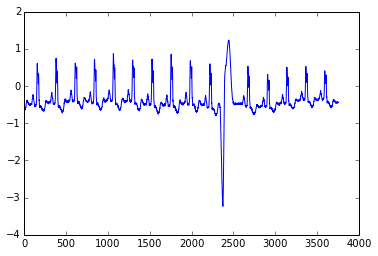

In [22]:
plt.plot(s)

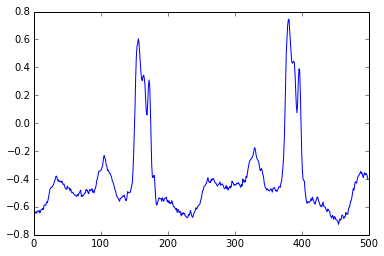

In [42]:
plt.plot(s.a.iloc[:500])

In [5]:
window = 100
stride = 10
nbins = 7
alphabet = "ABCD"
sax = pysax.SAXModel(window = window, stride = stride, nbins = nbins, alphabet=alphabet)
target = sax.symbolize_window(s.a.iloc[100:200])
print "looking for this symbol: %s" %target

looking for this symbol: BBACDCA


In [44]:
%time psymbols = sax.symbolize_signal(np.asarray(s.a))

CPU times: user 1.44 s, sys: 36.2 ms, total: 1.48 s
Wall time: 1.45 s


In [8]:
temp = sax.search_pattern(s.a, 100, 200, 0.05)

In [14]:
list({"start": t.start, "stop": t.stop} for t in temp)

[{'start': 40, 'stop': 140},
 {'start': 100, 'stop': 200},
 {'start': 260, 'stop': 360},
 {'start': 270, 'stop': 370},
 {'start': 320, 'stop': 420},
 {'start': 490, 'stop': 590},
 {'start': 500, 'stop': 600},
 {'start': 550, 'stop': 650},
 {'start': 560, 'stop': 660},
 {'start': 720, 'stop': 820},
 {'start': 780, 'stop': 880},
 {'start': 790, 'stop': 890},
 {'start': 940, 'stop': 1040},
 {'start': 950, 'stop': 1050},
 {'start': 1010, 'stop': 1110},
 {'start': 1180, 'stop': 1280},
 {'start': 1240, 'stop': 1340},
 {'start': 1410, 'stop': 1510},
 {'start': 1470, 'stop': 1570},
 {'start': 1630, 'stop': 1730},
 {'start': 1640, 'stop': 1740},
 {'start': 1700, 'stop': 1800},
 {'start': 1860, 'stop': 1960},
 {'start': 1870, 'stop': 1970},
 {'start': 1930, 'stop': 2030},
 {'start': 2100, 'stop': 2200},
 {'start': 2160, 'stop': 2260},
 {'start': 2550, 'stop': 2650},
 {'start': 2560, 'stop': 2660},
 {'start': 2610, 'stop': 2710},
 {'start': 2620, 'stop': 2720},
 {'start': 2790, 'stop': 2890},
 {'

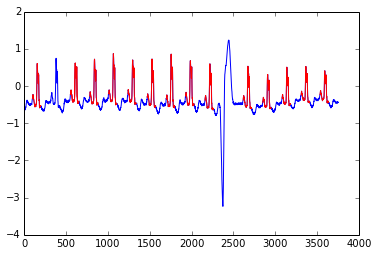

In [92]:
plt.plot(s.a)
for (i, w) in enumerate(psymbols):
    if w == target:
        plt.plot(range(i*stride,i*stride+100), s.a.iloc[i*stride:i*stride+100], 'r')

##tidy up 

In [32]:
def motif_detection(target_start, target_end, stride, nbins, alphabet, threshold):
    """
    ss: the signal as a numpy array 
    target_start, target_end: row number of the start and end of the segment to look for
    """
    window = target_end - target_start + 1
    sax = pysax.SAXModel(window = window, stride = stride, nbins = nbins, alphabet=alphabet)
    target = sax.symbolize_window(ss[target_start:target_end])
    print "looking for this symbol: %s" %target
    
    psymbols = sax.symbolize_signal(ss)
    #plot the result
    plt.plot(ss)
    for (i, w) in enumerate(psymbols):
        if sax.symbol_distance(w, target) <= threshold:
            plt.plot(range(i * stride, i * stride + window), ss[i * stride : i * stride + window], 'r')

looking for this symbol: BADDA


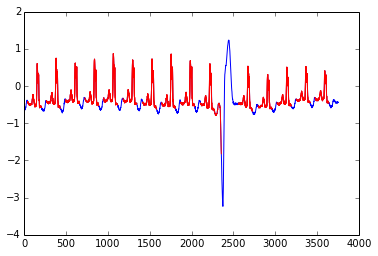

In [35]:
motif_detection(100, 200, stride = 5, nbins = 5, alphabet = "ABCD", threshold = 0.1)

looking for this symbol: DEDACCD


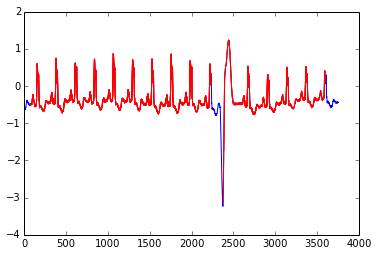

In [33]:
ss=np.asarray(s.a)
interact(motif_detection, target_start=(100,1000,10), target_end=(200,1000,10),
         stride=(1,20,2), nbins=(4, 8, 1), alphabet=["ABCD","ABCDE","ABCDEF"], threshold=(0,3,0.1))